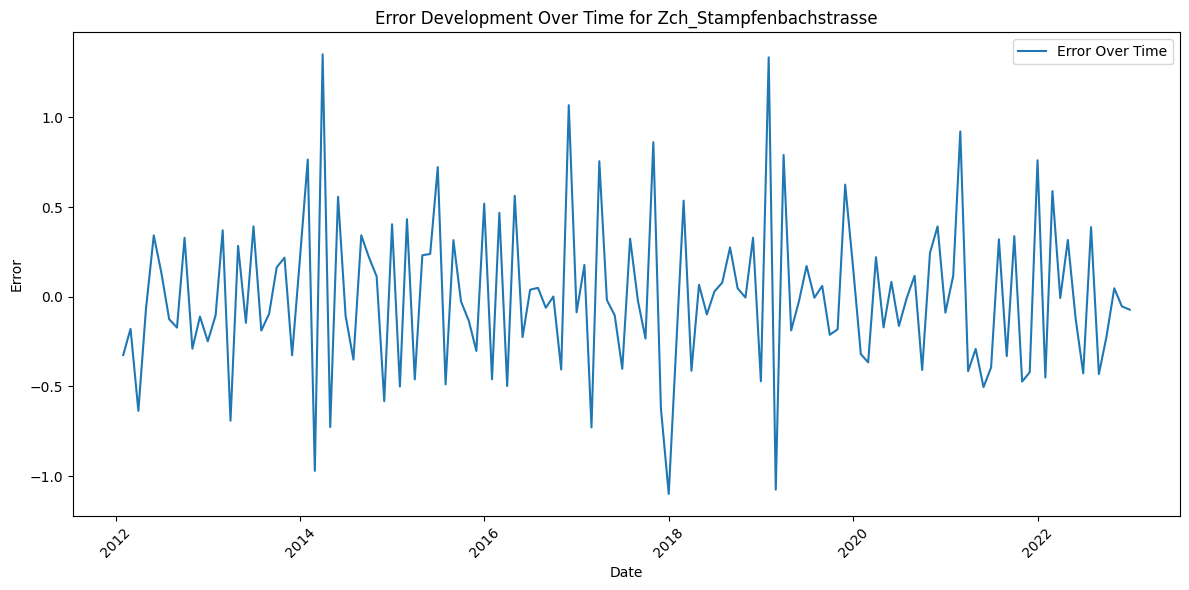

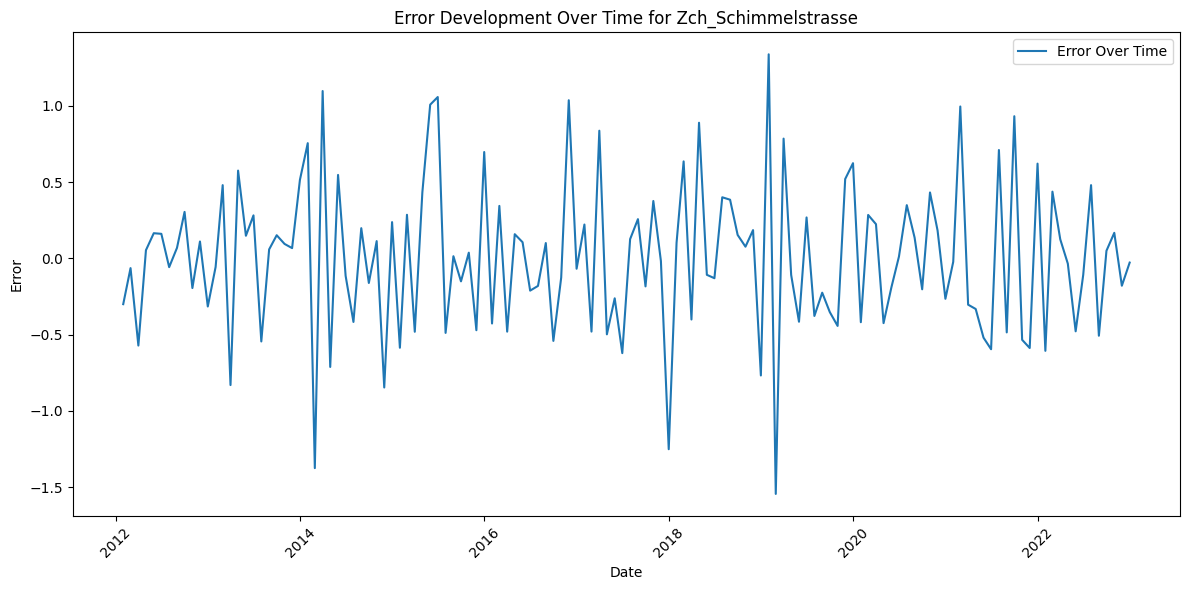

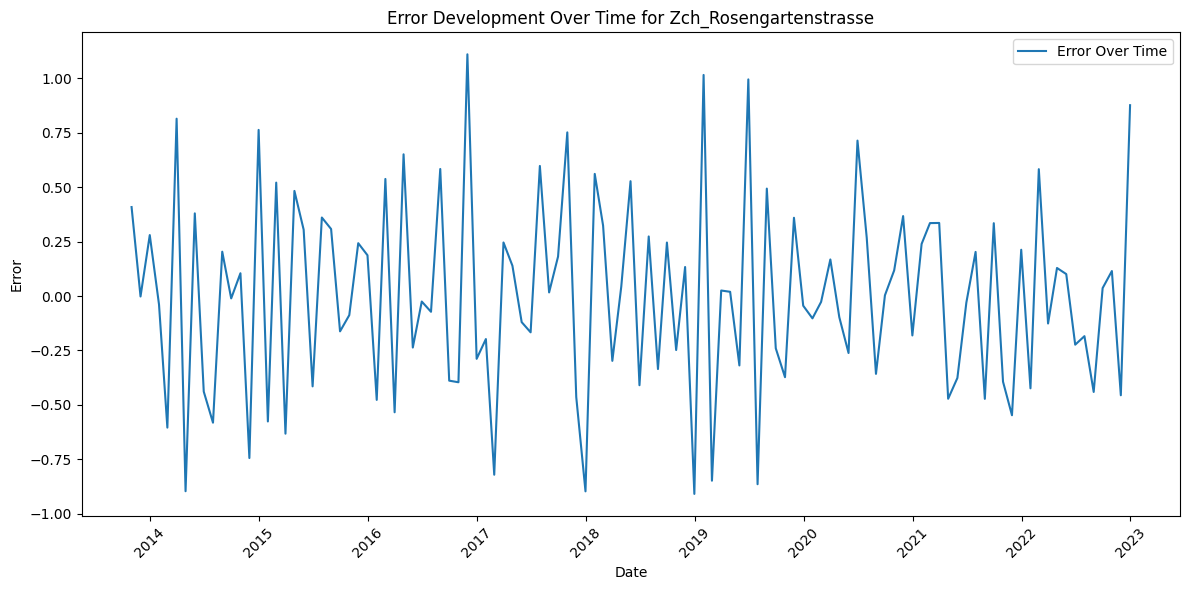

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to perform linear regression and plot error over time, with NaN handling
def analyze_street(data, street_name):
    # Filter data for the specific street
    street_data = data[data['Street'] == street_name]

    


    X = street_data.drop(['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
    y = street_data['NO2_tomorrow']

    # Linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predicting NO2 values
    predictions = model.predict(X)

    # Calculating errors
    errors = y - predictions

    # Plotting the error over time
    plt.figure(figsize=(12, 6))
    plt.plot(street_data['Datum'], errors, label='Error Over Time')
    plt.title(f'Error Development Over Time for {street_name}')
    plt.xlabel('Date')
    plt.ylabel('Error')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Load the dataset

df_cleaned = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned.csv')

# Convert 'Datum' to datetime and resample data to a monthly frequency for each street
df_cleaned['Datum'] = pd.to_datetime(df_cleaned['Datum'])
monthly_data = df_cleaned.set_index('Datum').groupby('Street').resample('M').mean().reset_index()

# Unique streets in the dataset
unique_streets = df_cleaned['Street'].unique()

# Analyzing and plotting for each street with monthly data
for street in unique_streets:
    analyze_street(monthly_data, street)


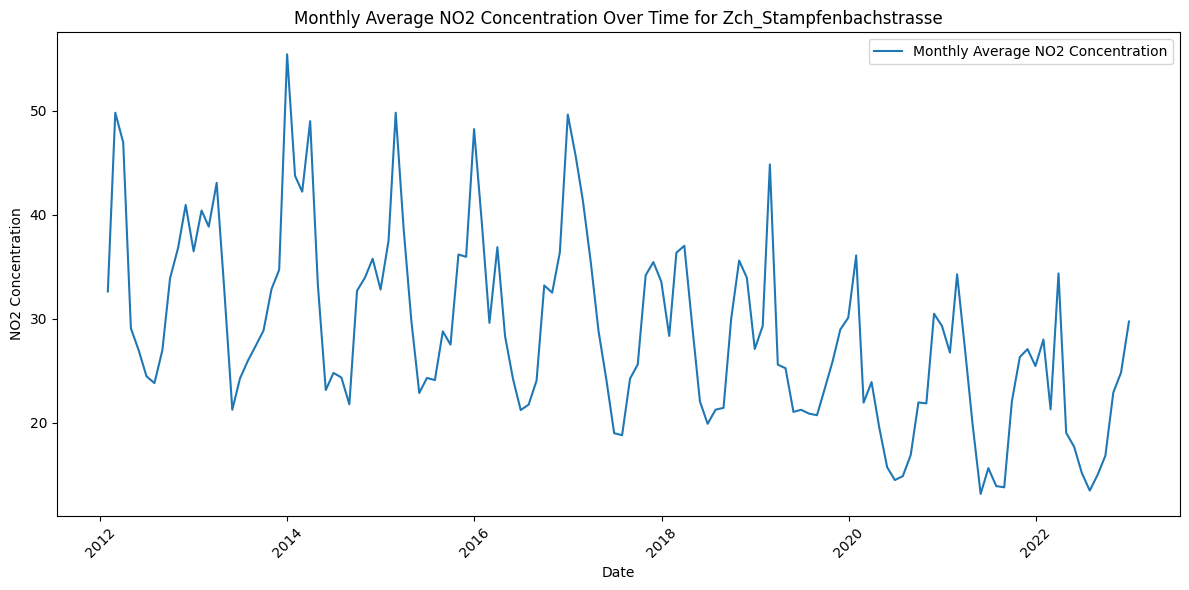

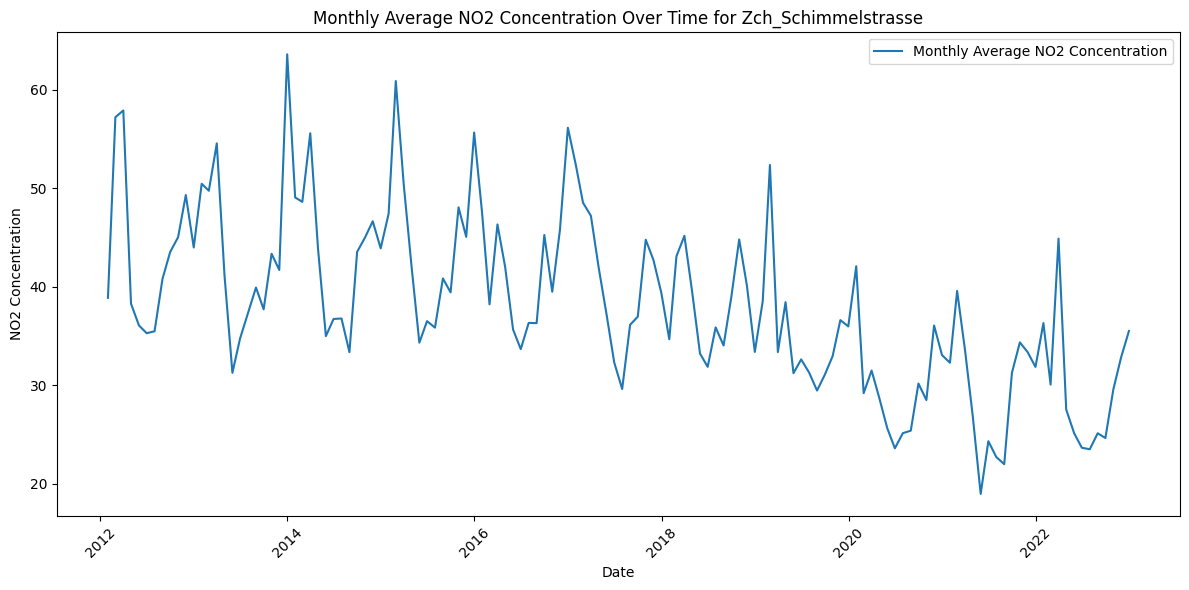

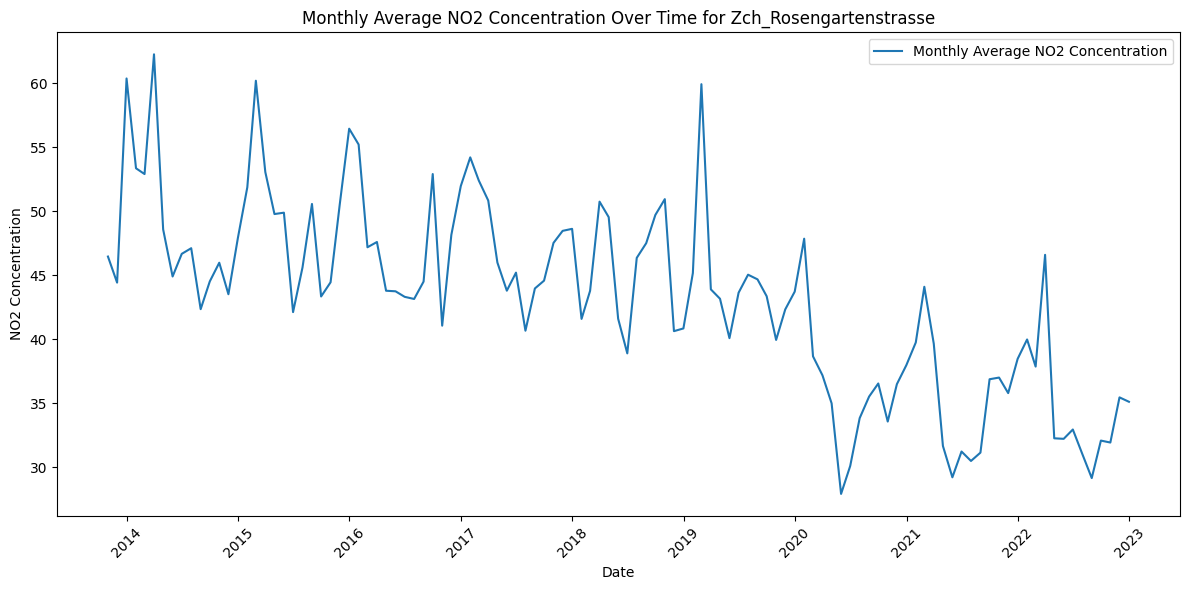

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot monthly NO2 concentration for a given street
def plot_monthly_NO2(data, street_name):
    # Filter data for the specific street
    street_data = data[data['Street'] == street_name]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(street_data['Datum'], street_data['NO2'], label='Monthly Average NO2 Concentration')
    plt.title(f'Monthly Average NO2 Concentration Over Time for {street_name}')
    plt.xlabel('Date')
    plt.ylabel('NO2 Concentration')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


data = df_cleaned

# Convert 'Datum' to datetime and resample data to a monthly frequency for each street
data['Datum'] = pd.to_datetime(data['Datum'])
monthly_data = data.set_index('Datum').groupby('Street').resample('M').mean().reset_index()

# Unique streets in the dataset
unique_streets = data['Street'].unique()

# Plotting monthly NO2 concentration for each street
for street in unique_streets:
    plot_monthly_NO2(monthly_data, street)


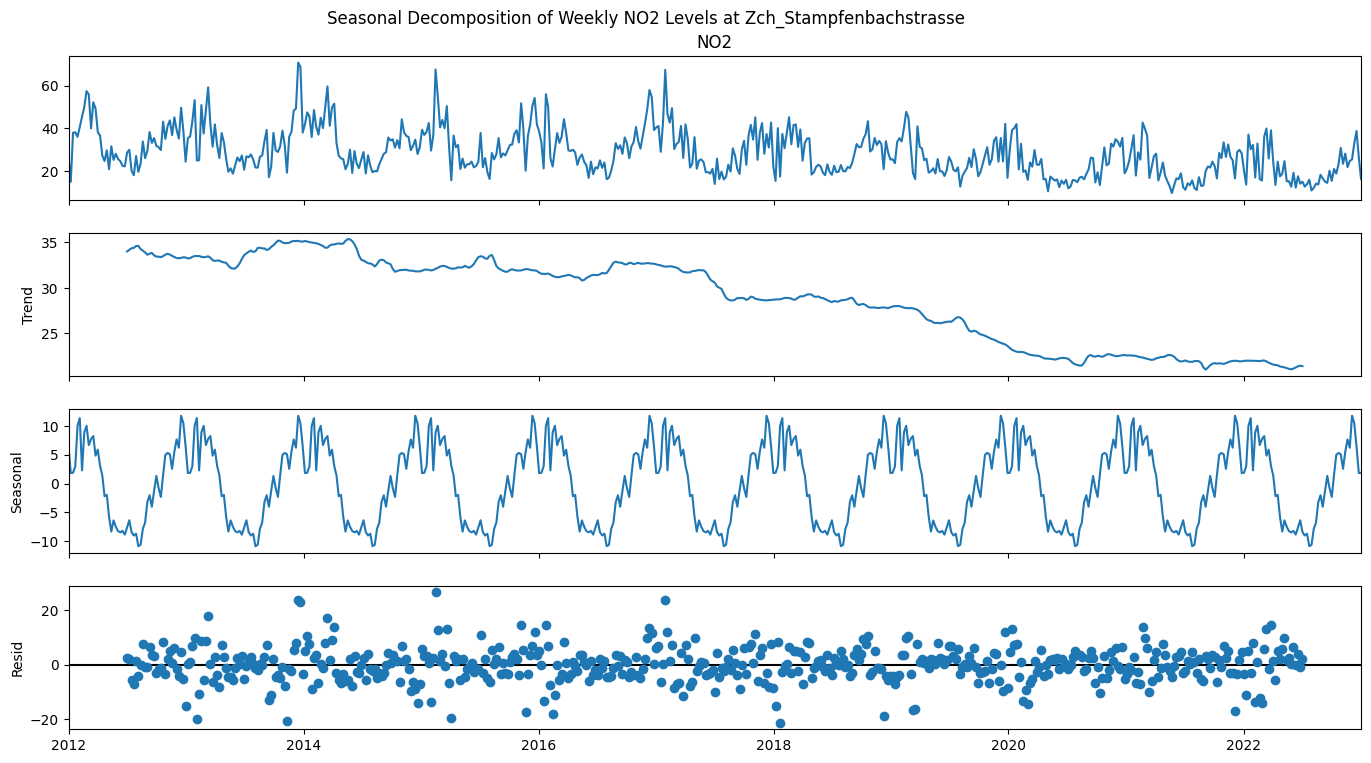

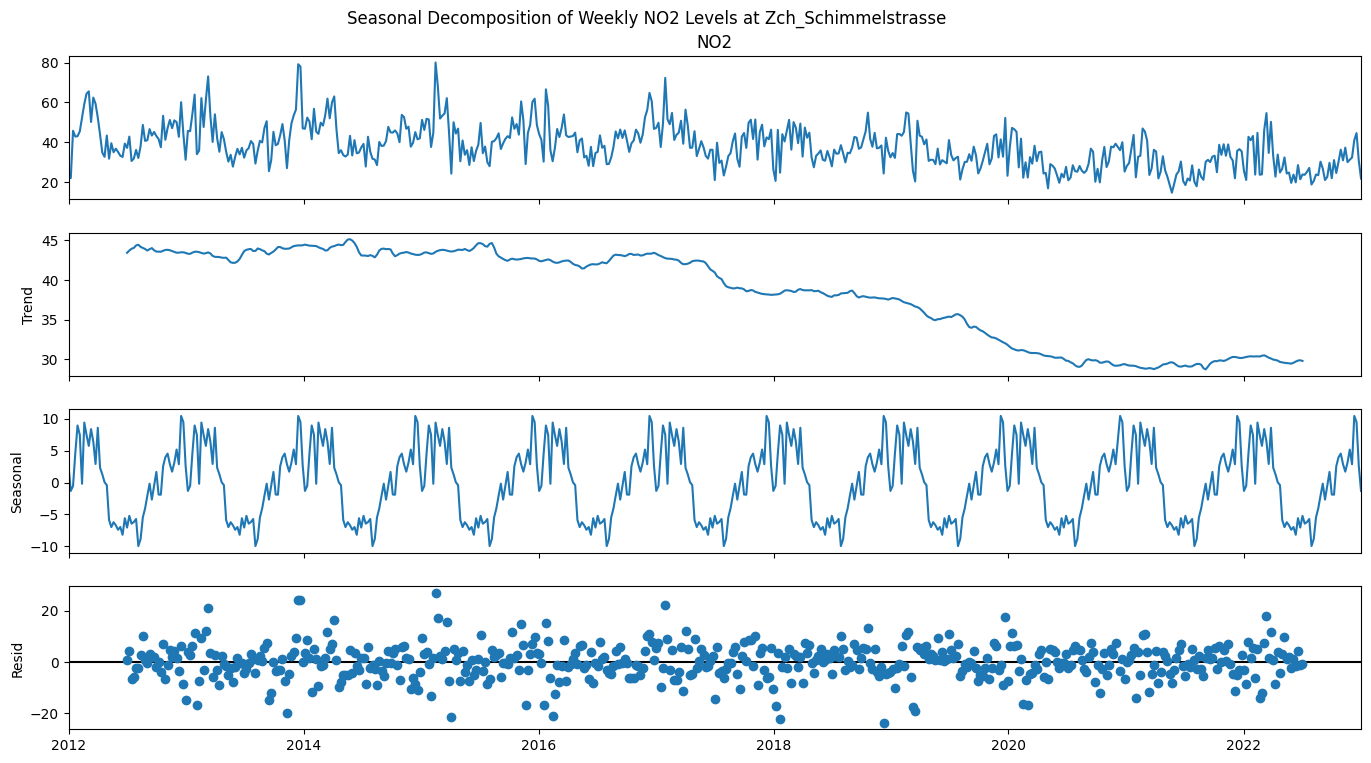

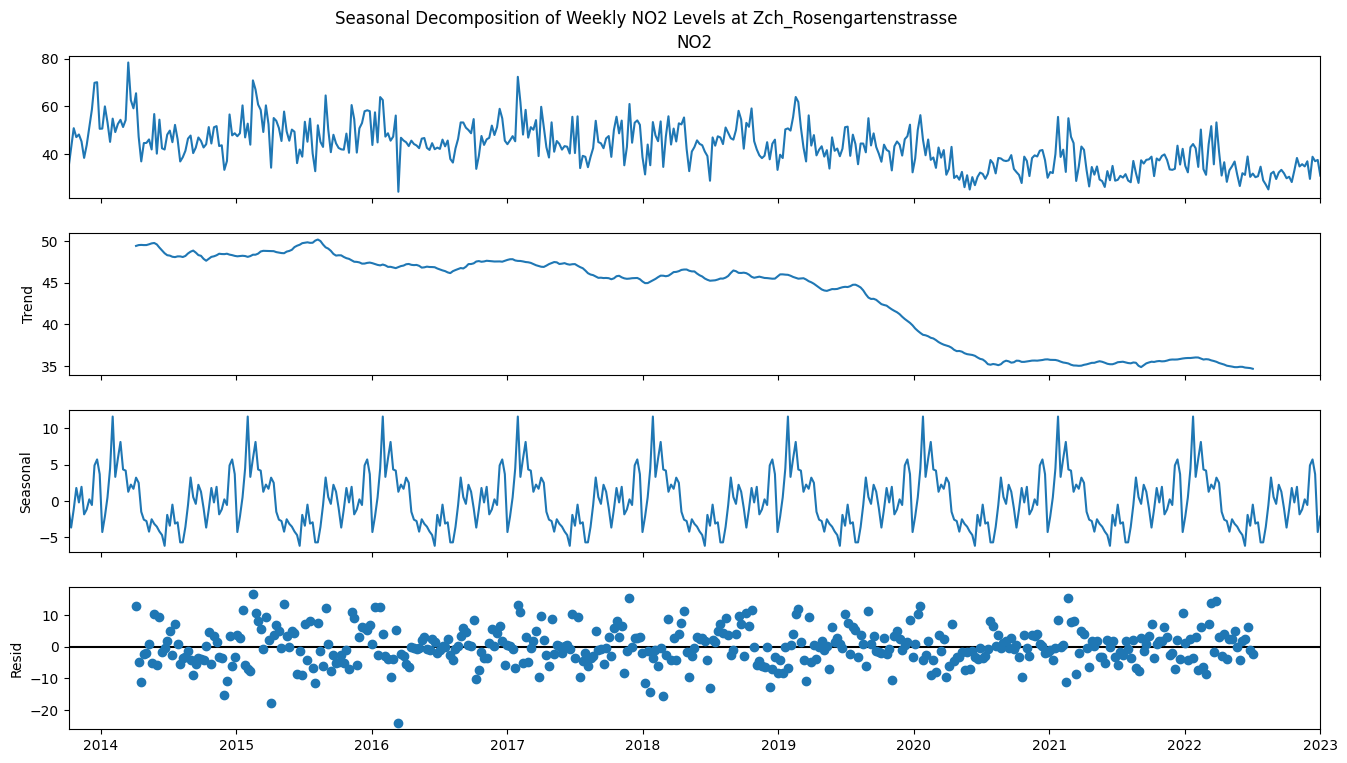

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Iterating through each street and performing seasonal decomposition
for street in unique_streets:
    # Filtering data for the current street
    street_data = df_cleaned[df_cleaned['Street'] == street]

    # Aggregating NO2 levels to weekly average
    street_data.set_index('Datum', inplace=True)
    weekly_street_data = street_data['NO2'].resample('W').mean()

    # Perform seasonal decomposition if there are enough data points
    if not weekly_street_data.isnull().all():
        decomposition = seasonal_decompose(weekly_street_data.dropna(), model='additive', period=52)

        # Plotting the decomposed components of the time series
        fig = decomposition.plot()
        fig.set_size_inches(15, 8)
        plt.suptitle(f'Seasonal Decomposition of Weekly NO2 Levels at {street}')
        plt.show()
    else:
        print(f"No NO2 values are available for {street} in the dataset.")


we observe strong seasonality as well as a donwards trend on all streets. the components look rather similar. our mdoel seems to capture this seasonality rather well. 

The trend, is captured in our model too (see error plotting above, as it does not increase)